<a href="https://colab.research.google.com/github/buterajacques1/Credit-Card-Fraud-Detection-Predictive-Models-/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [4]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPool1D, BatchNormalization
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_data.csv')

In [5]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [25]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [23]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    3970
1.0       2
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(3970, 31)
(2, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    3970.000000
mean       64.899597
std       213.612570
min         0.000000
25%         2.270000
50%        12.990000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1638.828463,-0.332459,0.308935,0.837446,0.011432,-0.029468,0.053530,0.147357,-0.071642,0.056211,...,0.059567,0.010282,-0.082957,-0.058743,0.029114,0.095244,-0.012637,0.044658,0.002668,64.899597
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [14]:
df = pd.concat([legit_sample, fraud], axis=0)

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1276,984,-0.453606,0.867001,1.330357,-0.030838,0.003416,-0.370968,0.371534,0.323785,-0.344432,...,-0.195197,-0.602181,0.053150,0.114064,-0.363316,0.078784,0.244376,0.082403,1.68,0.0
3575,3056,-1.369698,-0.237359,-0.699060,-3.036930,3.073045,2.509417,0.467239,0.407123,0.983638,...,-0.095787,0.343089,0.314595,1.010121,0.381929,-0.821523,0.026249,-0.101180,1.00,0.0
3559,3042,-0.686740,-3.373707,-1.315155,0.577998,-1.144627,-0.223411,1.410315,-0.484678,0.145660,...,0.600487,-0.628384,-1.108890,-0.427043,0.126395,1.047753,-0.287424,0.176376,1068.62,0.0
726,549,1.422461,-0.547422,-0.147438,-0.615979,-0.677018,-0.825597,-0.295487,-0.237954,-0.639154,...,0.122827,0.342161,-0.236404,-0.077528,0.828618,-0.034126,-0.017271,0.000946,30.00,0.0
3556,3039,-1.098833,0.723537,0.915569,1.267670,0.315262,0.306430,-0.064875,0.752223,-0.612132,...,0.077394,0.232133,-0.127850,-0.293836,-0.069470,-0.221764,0.302400,0.057269,19.38,0.0


In [16]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3440,2936,-0.635324,0.787333,1.087987,-2.151184,0.009488,-1.331124,1.011426,-0.251920,0.872044,...,0.087244,0.616557,-0.261653,0.514924,0.039751,-0.862362,0.334874,0.036531,1.00,0.0
293,209,-0.572011,0.374981,0.923823,-0.954006,0.753635,0.139495,1.450748,-0.551716,-0.126159,...,-0.030324,0.334779,-0.192455,-0.790313,0.110173,0.309765,-0.504723,-0.498287,95.56,0.0
3404,2923,-0.402594,0.547375,1.040719,-2.068023,0.214318,-1.073380,0.986795,-0.213035,1.073889,...,0.069585,0.537240,-0.247069,0.035645,-0.054309,-0.804384,0.244815,-0.020547,1.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [17]:
df['Class'].value_counts()

Class
0.0    492
1.0      2
Name: count, dtype: int64

In [21]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1729.518293,-0.323048,0.321807,0.855265,-0.004362,-0.006323,0.052044,0.218442,0.021637,0.106149,...,0.094736,0.000214,-0.092135,-0.051374,0.018843,0.113027,-0.004818,0.063725,0.000556,66.141829
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Finding Correlation

In [26]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis='columns', how='all')  # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Credit Card Fraud Dataset', fontsize=15)
    plt.show()

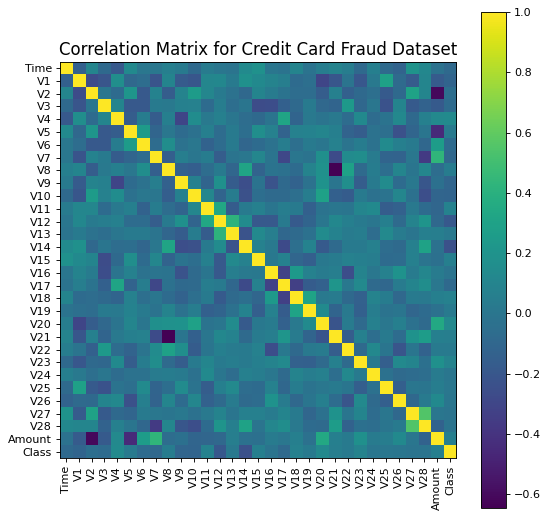

In [27]:

plotCorrelationMatrix(df, 8)


Scatter and Density Plot

In [30]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns', how='all')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

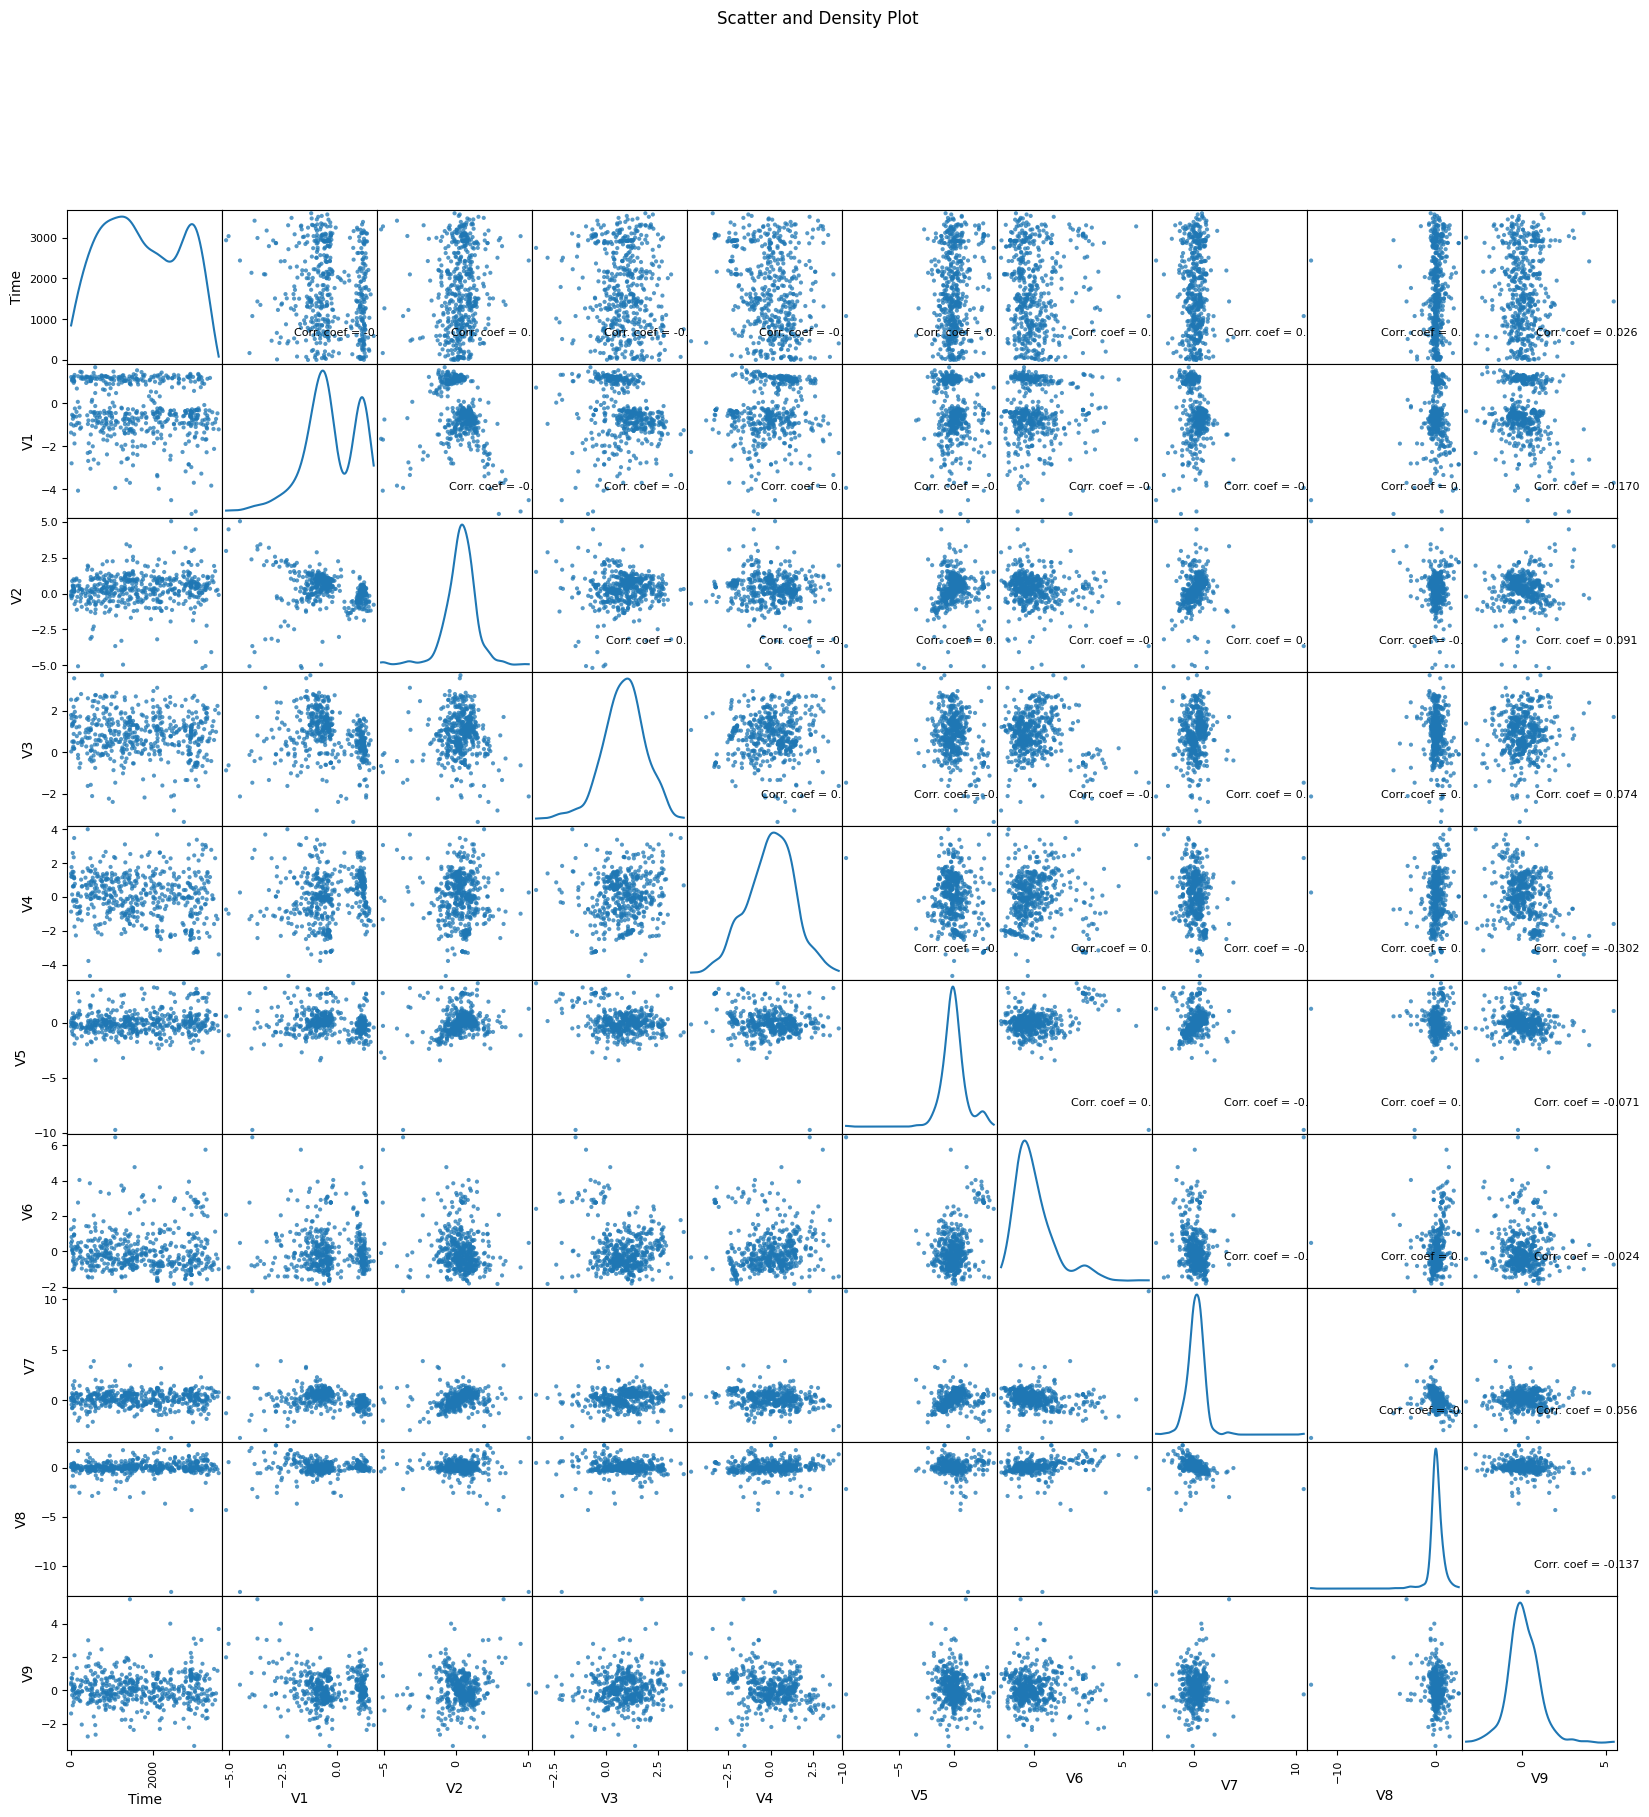

In [31]:
plotScatterMatrix(df, 20, 8)

SECTION 2: Data Preprocessing

In [32]:
# Define features x and y
x = df.drop(columns='Class', axis=1)
y = df['Class']


In [33]:
print(x)

      Time        V1        V2        V3        V4        V5        V6  \
1276   984 -0.453606  0.867001  1.330357 -0.030838  0.003416 -0.370968   
3575  3056 -1.369698 -0.237359 -0.699060 -3.036930  3.073045  2.509417   
3559  3042 -0.686740 -3.373707 -1.315155  0.577998 -1.144627 -0.223411   
726    549  1.422461 -0.547422 -0.147438 -0.615979 -0.677018 -0.825597   
3556  3039 -1.098833  0.723537  0.915569  1.267670  0.315262  0.306430   
...    ...       ...       ...       ...       ...       ...       ...   
3440  2936 -0.635324  0.787333  1.087987 -2.151184  0.009488 -1.331124   
293    209 -0.572011  0.374981  0.923823 -0.954006  0.753635  0.139495   
3404  2923 -0.402594  0.547375  1.040719 -2.068023  0.214318 -1.073380   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
1276  0.371534  0.323785 -0.344432  ..

In [34]:
print(y)

1276    0.0
3575    0.0
3559    0.0
726     0.0
3556    0.0
       ... 
3440    0.0
293     0.0
3404    0.0
541     1.0
623     1.0
Name: Class, Length: 494, dtype: float64


In [35]:
print(x.shape, y.shape)

(494, 30) (494,)


Split the data into Training data & Testing Data

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(395, 30) (395,) (99, 30) (99,)


Train Model without Optimization

In [38]:
epochs = 50
model = Sequential()
# Add convolution 2D
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [39]:
# Compile the model without any optimization technique
model.compile(loss=categorical_crossentropy,
              metrics=['accuracy'])
model.save('saved_models/model1.pkl')

In [ ]:
model.summary()

In [40]:
# Train the model
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



13/13 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 0.9722 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
 1/13 [=>............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



13/13 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.9949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9949 - val_loss: 0.

In [41]:
# Print the final accuracy
_, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Training Accuracy: 99.49%
Test Accuracy: 100.00%


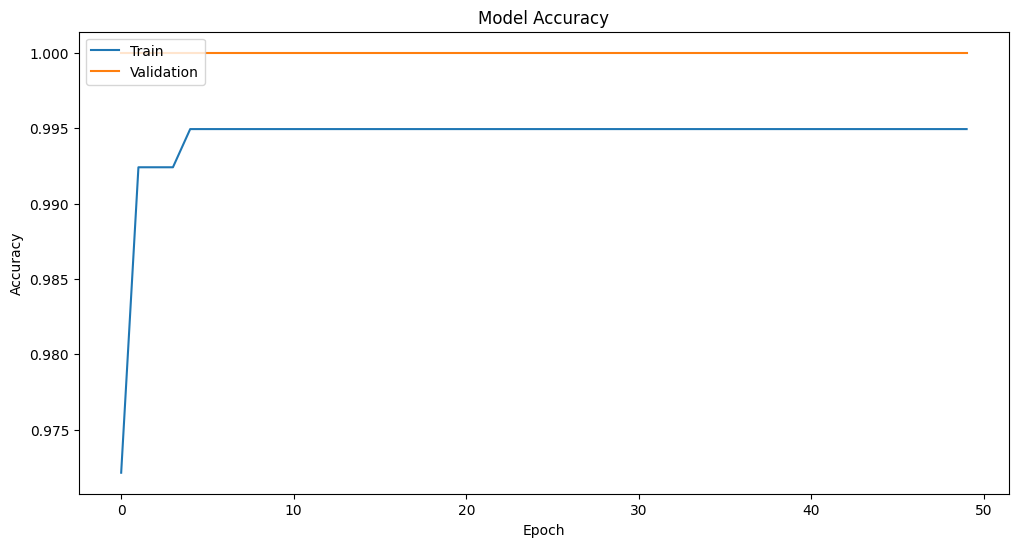

In [42]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


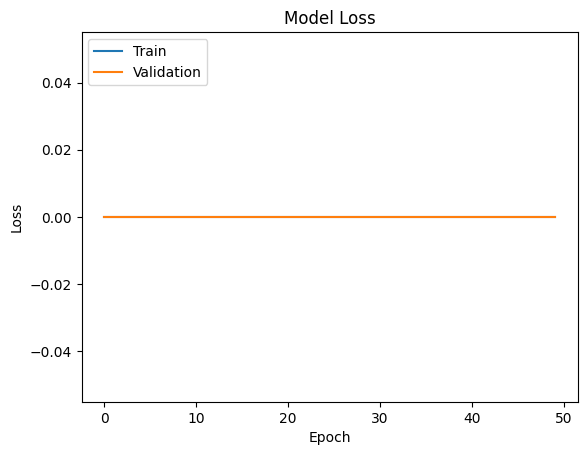

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

Model Training with Optimization Techniques

Adam Optimization

In [44]:
model2 = Sequential()
# Add convolution 2D
model2.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])
model2.save('saved_models/model2.pkl')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_3 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

In [45]:
adam_model = model2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
13/13 [==============================] - 3s 53ms/step - loss: 0.2809 - accuracy: 0.8861 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 2/50
13/13 [==============================] - 0s 20ms/step - loss: 0.0638 - accuracy: 0.9949 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0314 - accuracy: 0.9949 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0452 - accuracy: 0.9949 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0074 - accuracy: 0.9949 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 8/50
13

In [46]:
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Training Accuracy: 100.00%
Test Accuracy: 100.00%


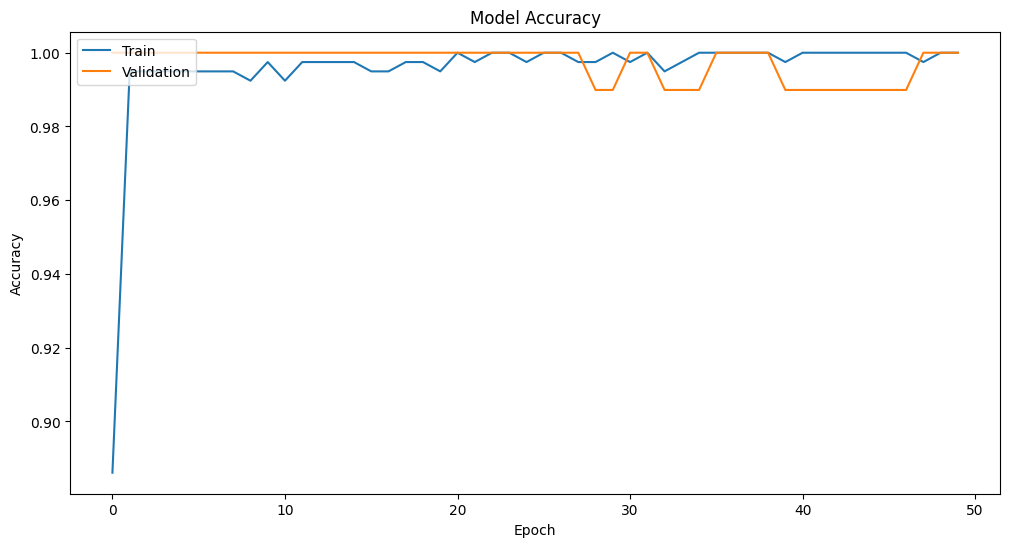

In [47]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(adam_model.history['accuracy'])
plt.plot(adam_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Stochastic Gradient Descent Optimization technique

In [48]:
model3 = Sequential()
# Add convolution 2D
model3.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))


model3.compile(optimizer=SGD(0.9),loss='binary_crossentropy',metrics=['accuracy'])
model3.save('saved_models/model3.pkl')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)           

In [49]:
sgd_model = model3.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
13/13 [==============================] - 2s 47ms/step - loss: 4.6203 - accuracy: 0.9241 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
13/13 [==============================] - 0s 17ms/step - loss: 3939.7180 - accuracy: 0.9772 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.9165 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.9949 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.9949 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 0s 22ms/step - loss: nan - accuracy: 0.9949 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.9949 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/50
13/13 [==============

In [50]:
_, train_accuracy = model3.evaluate(X_train, y_train)
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 11ms/step - loss: nan - accuracy: 1.0000
Training Accuracy: 99.49%
Test Accuracy: 100.00%


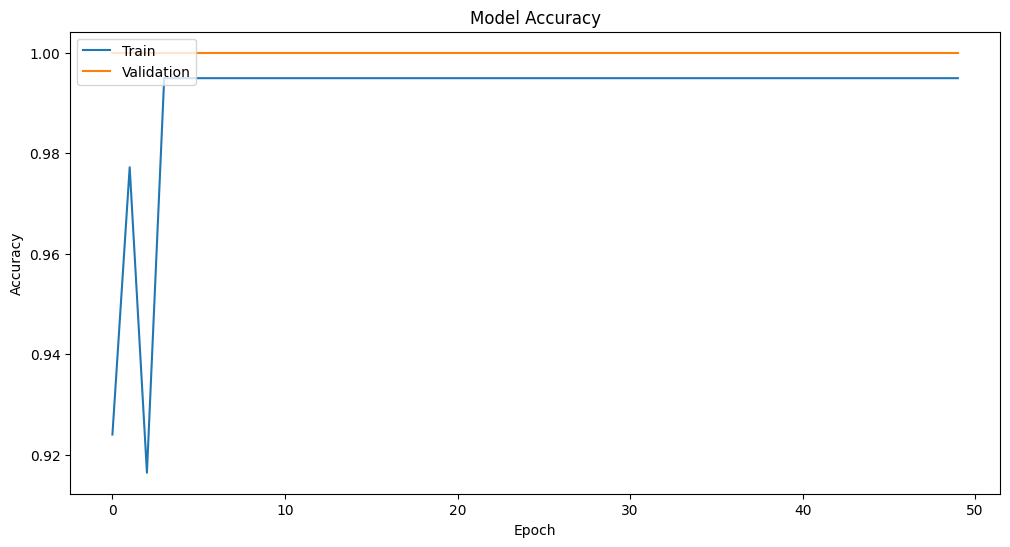

In [51]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(sgd_model.history['accuracy'])
plt.plot(sgd_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Root Mean Square Propagation

In [52]:
model4 = Sequential()
model4.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1,activation='sigmoid'))


model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])
model4.save('saved_models/model4.pkl')
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_7 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 28, 64)           

In [53]:
rms_model = model4.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
13/13 [==============================] - 2s 47ms/step - loss: 0.1961 - accuracy: 0.9316 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 2/50
13/13 [==============================] - 0s 19ms/step - loss: 0.0258 - accuracy: 0.9899 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 0s 18ms/step - loss: 0.0397 - accuracy: 0.9899 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 0s 19ms/step - loss: 0.0463 - accuracy: 0.9949 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 0s 18ms/step - loss: 0.0394 - accuracy: 0.9924 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 0s 20ms/step - loss: 0.0347 - accuracy: 0.9949 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 0s 19ms/step - loss: 0.0140 - accuracy: 0.9949 - val_loss: 6.3282e-04 - val_accuracy: 1.0000
Epoch 8/5

In [54]:
_, train_accuracy = model4.evaluate(X_train, y_train)
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 5ms/step - loss: 9.0156e-04 - accuracy: 1.0000
Training Accuracy: 100.00%
Test Accuracy: 100.00%


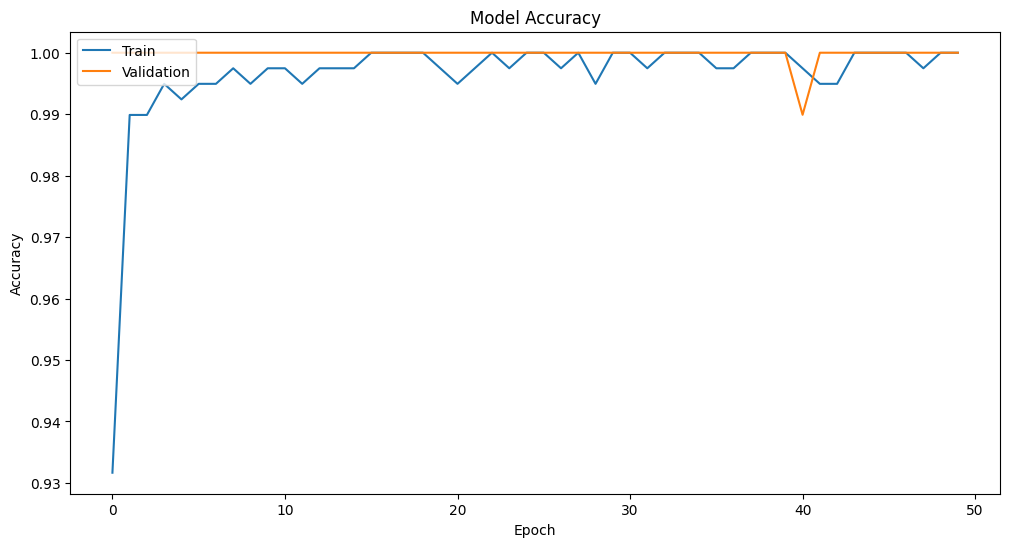

In [55]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(rms_model.history['accuracy'])
plt.plot(rms_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Error Analysis: Make Predictions using the best saved model

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy_score(y_test,y_pred)
def make_predictions(model_path, X_test, y_test):
    # Load the model
    model = load_model(model_path)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy_score(y_test,y_pred)
    # Make predictions
    predictions = model.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions_labels = np.round(predictions).flatten()

    # Convert y_test to binary labels (assuming it's 0 or 1)
    true_labels = y_test

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate classification report
    report = classification_report(true_labels, y_pred)
    print("Classification Report:\n", report)


4/4 [==============================] - 0s 5ms/step


Without Optimization

In [57]:
model_path = 'saved_models/model1.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[95  4]
 [ 0  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        99
         1.0       0.00      0.00      0.00         0

    accuracy                           0.96        99
   macro avg       0.50      0.48      0.49        99
weighted avg       1.00      0.96      0.98        99



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



With Adam Optimization

In [58]:
model_path = 'saved_models/model2.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 7ms/step
Confusion Matrix:
 [[ 0 99]
 [ 0  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      99.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      99.0
   macro avg       0.00      0.00      0.00      99.0
weighted avg       0.00      0.00      0.00      99.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

With SGD

In [59]:
model_path = 'saved_models/model3.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[99]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



With RMSOp

In [60]:
model_path = 'saved_models/model4.pkl'
make_predictions(model_path, X_test, y_test )


4/4 [==============================] - 0s 8ms/step
Confusion Matrix:
 [[99]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

